<a href="https://colab.research.google.com/github/xsvc/Covid_XrayScan_CapstoneProject/blob/main/COVID_dataset_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Stage 0: Capstone Project  

Importing Google Drive

Importing all Libraries

In [47]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [48]:
!pip install tensorflow==2.9.1

In [49]:
!pip install numpy pandas seaborn matplotlib scikit-learn opencv-python

In [50]:
import os # Operating System
import cv2 # OpenCV --> library untuk manipulasi gambar
# ubah warna jadi hitam putih, crop, dll
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [51]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print('working')

# Example: Create a simple sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


working


In [52]:
#Read Data and Store it in a dataframe
# Generate data paths with labels
#Use your own dataset path in Google drive
data_dir = '/content/gdrive/MyDrive/datacovid/Covid19-dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [53]:
data_dir = '/content/gdrive/MyDrive/datacovid/Covid19-dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

## Stage 1: Exploratory Data Analysis Stage

My EDA questions are

•	EDA Q1 How is the Data distribution in head and tail?

•	EDA Q2 How can we display each Image from the Classes given in the Dataset?

•	EDA Q3 What is the Geometric transformation analysis of images?

•	EDA Q4 Analysing Salient Discriminative Features (Edges and Corners) of images?

•	EDA Q5 - How can we analyze illumination and lighting artifacts by examining the camera effects/exposure of an image?



EDA Q1: How is the data distribution Head and Tail


In [54]:
df.head(6)

,filepaths,labels
0,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
1,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
2,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
3,/content/gdrive/MyDrive/datacovid/Covid19-data...,train
4,/content/gdrive/MyDrive/datacovid/Covid19-data...,train
5,/content/gdrive/MyDrive/datacovid/Covid19-data...,train


In [55]:
df.tail(6)

,filepaths,labels
0,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
1,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
2,/content/gdrive/MyDrive/datacovid/Covid19-data...,test
3,/content/gdrive/MyDrive/datacovid/Covid19-data...,train
4,/content/gdrive/MyDrive/datacovid/Covid19-data...,train
5,/content/gdrive/MyDrive/datacovid/Covid19-data...,train


 EDA Q2 How can we display each Image from the Classes given in the Dataset?

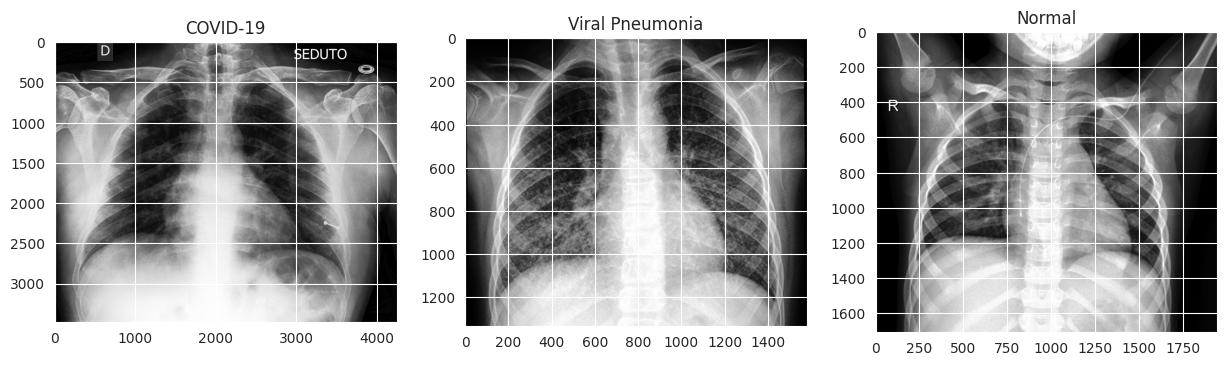

In [56]:
################################################################
#Step 1 EDA: Read and Display Images
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Define the paths for images of the three classes
img_path_covid = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Covid/01.jpeg'
img_path_pneumonia = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Viral Pneumonia/01.jpeg'
img_path_normal = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Normal/01.jpeg'

# Load the images
img_covid = cv2.imread(img_path_covid)
img_pneumonia = cv2.imread(img_path_pneumonia)
img_normal = cv2.imread(img_path_normal)

# Create a plot to display the images
plt.figure(figsize=(15, 5))
plt.subplot(131)  # First subplot
plt.imshow(cv2.cvtColor(img_covid, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title('COVID-19')

plt.subplot(132)  # Second subplot
plt.imshow(cv2.cvtColor(img_pneumonia, cv2.COLOR_BGR2RGB))
plt.title('Viral Pneumonia')

plt.subplot(133)  # Third subplot
plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
plt.title('Normal')

plt.show()
################################################################

EDA Q3 What is the Geometric transformation analysis of images?

(<matplotlib.image.AxesImage at 0x7b37464f2500>,
 Text(0.5, 1.0, 'Transposed image\n PNEUMONIA'))

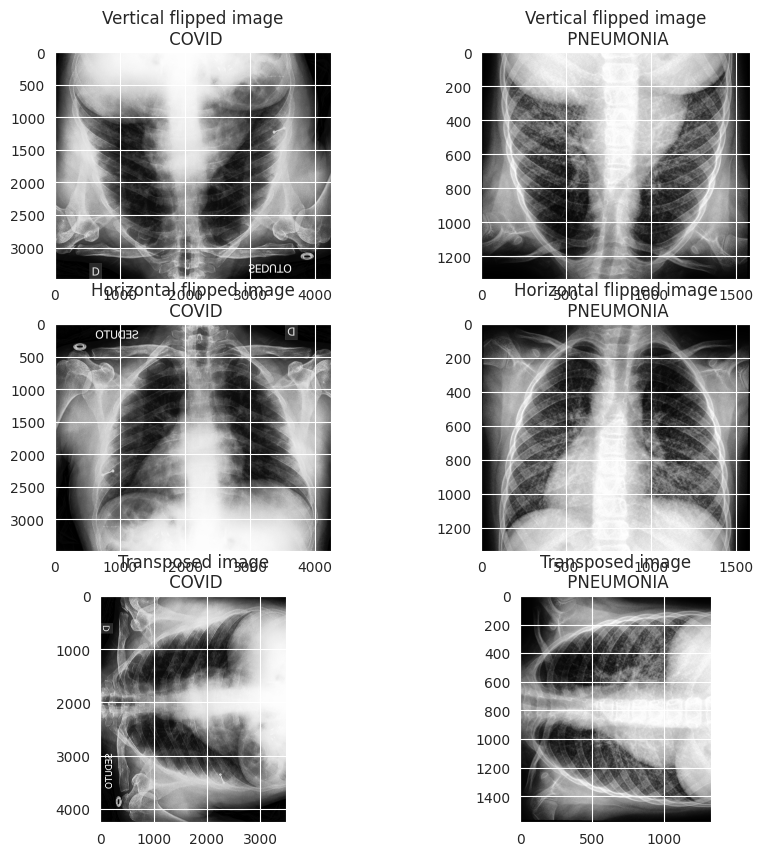

In [57]:
################################################################
#Step 2 EDA- Geometric transformation analysis of images
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path_1 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Covid/01.jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Viral Pneumonia/01.jpeg'
img_2 = cv2.imread(img_path_2)

#Basic image manipulation (rotating/flipping/transpose)
flip_img_v1=cv2.flip(img_1,0) # vertical flip
flip_img_v2=cv2.flip(img_2,0) # vertical flip
#horizontal flip
flip_img_h1=cv2.flip(img_1,1) # horizontal flip
flip_img_h2=cv2.flip(img_2,1) # horizontal flip
#transpose
transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(flip_img_v1),plt.title('Vertical flipped image\n COVID')
plt.subplot(322)
plt.imshow(flip_img_v2),plt.title('Vertical flipped image\n PNEUMONIA')
plt.subplot(323)
plt.imshow(flip_img_h1), plt.title('Horizontal flipped image\n COVID')
plt.subplot(324)
plt.imshow(flip_img_h2), plt.title('Horizontal flipped image\n PNEUMONIA')
plt.subplot(325)
plt.imshow(transp_img_1),plt.title('Transposed image\n COVID')
plt.subplot(326)
plt.imshow(transp_img_2),plt.title('Transposed image\n PNEUMONIA')
#################################################################

**THIS IS NOT IN THE EDA QUESTIONS**

(<Axes: title={'center': 'Blurred image(d=6)\n PNEUMONIA'}>,
 Text(0.5, 1.0, 'Blurred image(d=6)\n PNEUMONIA'))

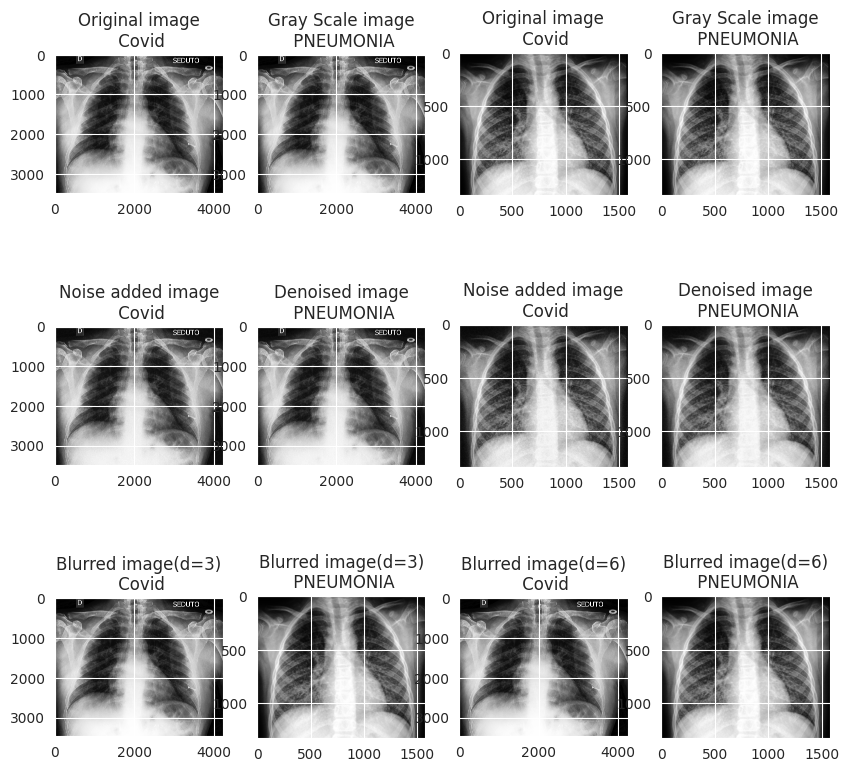

In [58]:
################################################################
#Step 3 Colour and Texture Analysis
#Conversion to Gray scale image needed for colour and texture analysis
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

img_path_1 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Covid/01.jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Viral Pneumonia/01.jpeg'
img_2 = cv2.imread(img_path_2)

#gray scale conversion
img_1_gray = skic.rgb2gray(img_1)
img_2_gray = skic.rgb2gray(img_2)

# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)
img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)

#Noise reduction using Gaussian Blur
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_1_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur6 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.figure(figsize=(10,10))
#VisualisingGray scale images visualisation
plt.subplot(341), plt.imshow(img_1),plt.title('Original image\n Covid')
plt.subplot(342), plt.imshow(img_1_gray, cmap = 'gray'),plt.title('Gray Scale image\n PNEUMONIA')
plt.subplot(343), plt.imshow(img_2),plt.title('Original image\n Covid')
plt.subplot(344), plt.imshow(img_2_gray, cmap = 'gray'),plt.title('Gray Scale image\n PNEUMONIA')

#Visualising Noising-Denoising images
plt.subplot(345), plt.imshow(img_1_n,cmap = 'gray'), plt.title('Noise added image\n Covid')
plt.subplot(346), plt.imshow(img_1_d,cmap = 'gray'),plt.title('Denoised image\n PNEUMONIA')
plt.subplot(347), plt.imshow(img_2_n,cmap = 'gray'),plt.title('Noise added image\n Covid')
plt.subplot(348), plt.imshow(img_2_d,cmap = 'gray'),plt.title('Denoised image\n PNEUMONIA')

#Visualising Noise Reduction with Gaussian Blurring
plt.subplot(349), plt.imshow(img_1_blur3,cmap = 'gray'), plt.title('Blurred image(d=3)\n Covid')
plt.subplot(3,4,10), plt.imshow(img_2_blur3,cmap = 'gray'),plt.title('Blurred image(d=3)\n PNEUMONIA')
plt.subplot(3,4,11), plt.imshow(img_1_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n Covid')
plt.subplot(3,4,12), plt.imshow(img_2_blur6,cmap = 'gray'),plt.title('Blurred image(d=6)\n PNEUMONIA')
#################################################################

EDA Q4 Analysing Salient Discriminative Features (Edges and Corners) of images?



In [59]:
################################################################
#Step 4 EDA- Analysing Salient Discriminative Features (Edges and Corners) of images

#Conversion to Gray scale image needed for extracting edges and corners
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline

img_path_1 = '/content/drive/MyDrive/datacovid/Covid19-dataset/train/Covid/01.jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/datacovid/Covid19-dataset/train/Viral Pneumonia/01.jpeg'
img_2 = cv2.imread(img_path_2)


#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

#Canny edge detector

#threshold selection
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green

edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

#Corner detector
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]


#Visualisng Edges and Corners
plt.figure(figsize=(10,10))
#Visualising Sobel Edges
plt.subplot(341), plt.imshow(sobelx_img_1, cmap = 'gray'),plt.title('Horizontal edges\n COVID')
plt.subplot(342), plt.imshow(sobely_img_1, cmap = 'gray'),plt.title('Horizontal edges\n PNEUMONIA 1')
plt.subplot(343), plt.imshow(sobelx_img_2, cmap = 'gray'),plt.title('Vertical edges\n COVID')
plt.subplot(344), plt.imshow(sobely_img_2, cmap = 'gray'),plt.title('Vertical edges\n PNEUMONIA 1')
#Visualising Canny Edges
plt.subplot(345), plt.imshow(img_1),plt.title('Original image\n COVID')
plt.subplot(346), plt.imshow(edgeresult_1, cmap = 'gray'),plt.title('Canny edges\n PNEUMONIA 1')
plt.subplot(347), plt.imshow(img_1),plt.title('Original image\n COVID')
plt.subplot(348), plt.imshow(edgeresult_2, cmap = 'gray'),plt.title('Vertical edges\n PNEUMONIA 1')
#Visualising Corners
plt.subplot(349), plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)),plt.title('Original image\n COVID')
plt.subplot(3,4,10), plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n PNEUMONIA 1')
plt.subplot(3,4,11), plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)),plt.title('Original image\n COVID')
plt.subplot(3,4,12), plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB)),plt.title('Image with Corners\n PNEUMONIA 1')

#################################################################

error: ignored

•	EDA Q5 - How can we analyze illumination and lighting artifacts by examining the camera effects/exposure of an image?

In [ ]:
#############################################################################

#Step 5 EDA: Analysing illumination and lighting artefacts by examining the camera effects/exposure of an #image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
import skimage.exposure as skie
%matplotlib inline

img_path_1 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Covid/01.jpeg'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/gdrive/MyDrive/datacovid/Covid19-dataset/train/Viral Pneumonia/01.jpeg'
img_2 = cv2.imread(img_path_2)


def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()


    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])
    plt.show()

show(img_1)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_1))


show(img_2)
# adaptive histogram equalisation
show(skie.equalize_adapthist(img_2))


#class 1 image
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq_1 = skif.sobel(img)
show(sobimg_heq_1)
#class 2 image
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq_2 = skif.sobel(img)
show(sobimg_heq_2)

###################################################################################

##Stage 2: PDA (Predictive Data Analytics)

Confidence Score

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/drive/MyDrive/datacovid/Covid19-dataset/test/Normal/0101.jpeg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/drive/MyDrive/datacovid/Covid19-dataset/test/Viral Pneumonia/0101.jpeg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
